In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("train_data.csv")

In [3]:
train.head(2)

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,target,registration_year,registration_month
0,1,user_id1,my library,Local playlist more,local-library,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,...,26.0,male,9.0,2011-11-07,NaN,輕輕 (Lightly),TWK231507907,1.0,2011,11
1,2,user_id2,my library,Local playlist more,local-library,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,...,27.0,female,9.0,2013-09-12,2017-09-12,雨天 (雨天),TWA530617601,1.0,2013,9


In [4]:
# Dropping 'registration_init_time' and 'registration_month' from train dataset
train = train.drop(columns=['registration_init_time', 'registration_month'], axis=0)

# To check if the columns are dropped
train.head(2)

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,expiration_date,song_name,isrc,target,registration_year
0,1,user_id1,my library,Local playlist more,local-library,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,NaN,輕輕 (Lightly),TWK231507907,1.0,2011
1,2,user_id2,my library,Local playlist more,local-library,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2017-09-12,雨天 (雨天),TWA530617601,1.0,2013
2,3,user_id2,my library,Local playlist more,local-library,247911.0,465,莫文蔚 (Karen Mok),Skot Suyama,李焯雄,3.0,9.0,27.0,female,9.0,2017-09-12,愛死你,TWA470326002,1.0,2013
3,4,user_id3,my library,Local playlist more,local-library,210048.0,1259,蛋堡 (Soft Lipa),杜振熙,杜振熙/（OT：白鴿）伍佰,3.0,13.0,34.0,male,9.0,2017-09-12,史詩,TWI451300037,1.0,2010
4,5,user_id4,my library,Local playlist more,local-library,248685.0,465,朱俐靜 (Miu Chu),王雅君,王雅君,3.0,13.0,19.0,male,4.0,NaN,一千萬次的淚水,TWD631313605,1.0,2015


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825700 entries, 0 to 1825699
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   song_id_new         int64  
 1   user_id_new         object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   song_length         float64
 6   genre_ids           object 
 7   artist_name         object 
 8   composer            object 
 9   lyricist            object 
 10  language            float64
 11  city                float64
 12  age                 float64
 13  gender              object 
 14  registered_via      float64
 15  expiration_date     object 
 16  song_name           object 
 17  isrc                object 
 18  target              float64
 19  registration_year   int64  
dtypes: float64(6), int64(2), object(12)
memory usage: 278.6+ MB


In [6]:
train.shape

(1825700, 20)

In [7]:
train.head(3)

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,expiration_date,song_name,isrc,target,registration_year
0,1,user_id1,my library,Local playlist more,local-library,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,NaN,輕輕 (Lightly),TWK231507907,1.0,2011
1,2,user_id2,my library,Local playlist more,local-library,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2017-09-12,雨天 (雨天),TWA530617601,1.0,2013
2,3,user_id2,my library,Local playlist more,local-library,247911.0,465,莫文蔚 (Karen Mok),Skot Suyama,李焯雄,3.0,9.0,27.0,female,9.0,2017-09-12,愛死你,TWA470326002,1.0,2013


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder= LabelEncoder()

In [10]:
categorical_columns = [
    'user_id_new', 'source_system_tab', 'source_screen_name', 
    'source_type', 'genre_ids', 'artist_name', 'composer', 
    'lyricist', 'gender', 'song_name', 'isrc'
]

In [11]:
# Apply label encoding to each categorical column
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col].astype(str))

# Check the first few rows to verify the changes
train.head()

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,expiration_date,song_name,isrc,target,registration_year
0,1,0,3,8,3,224597.0,132,4806,16376,15270,3.0,15.0,26.0,1,9.0,NaN,35379,31855,1.0,2011
1,2,4463,3,8,3,241975.0,132,4907,8925,13319,3.0,9.0,27.0,0,9.0,2017-09-12,36545,23283,1.0,2013
2,3,4463,3,8,3,247911.0,132,5846,12926,16718,3.0,9.0,27.0,0,9.0,2017-09-12,27266,21798,1.0,2013
3,4,5574,3,8,3,210048.0,38,5943,17670,16795,3.0,13.0,34.0,1,9.0,2017-09-12,22822,30773,1.0,2010
4,5,6685,3,8,3,248685.0,132,5240,18547,17764,3.0,13.0,19.0,1,4.0,NaN,19421,28593,1.0,2015


In [12]:
train.isnull().sum()

song_id_new                0
user_id_new                0
source_system_tab          0
source_screen_name         0
source_type                0
song_length                0
genre_ids                  0
artist_name                0
composer                   0
lyricist                   0
language                   0
city                       0
age                        0
gender                     0
registered_via             0
expiration_date       528923
song_name                  0
isrc                       0
target                     0
registration_year          0
dtype: int64

In [13]:
train.dropna(inplace=True)

In [14]:
train.isnull().sum().sum()

0

In [15]:
train['expiration_date'] = pd.to_datetime(train['expiration_date'], format='%Y-%m-%d', errors='coerce')
train['expiration_date'] = train['expiration_date'].view('int64') // 10**9 

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296777 entries, 1 to 1825699
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   song_id_new         1296777 non-null  int64  
 1   user_id_new         1296777 non-null  int32  
 2   source_system_tab   1296777 non-null  int32  
 3   source_screen_name  1296777 non-null  int32  
 4   source_type         1296777 non-null  int32  
 5   song_length         1296777 non-null  float64
 6   genre_ids           1296777 non-null  int32  
 7   artist_name         1296777 non-null  int32  
 8   composer            1296777 non-null  int32  
 9   lyricist            1296777 non-null  int32  
 10  language            1296777 non-null  float64
 11  city                1296777 non-null  float64
 12  age                 1296777 non-null  float64
 13  gender              1296777 non-null  int32  
 14  registered_via      1296777 non-null  float64
 15  expiration_date     

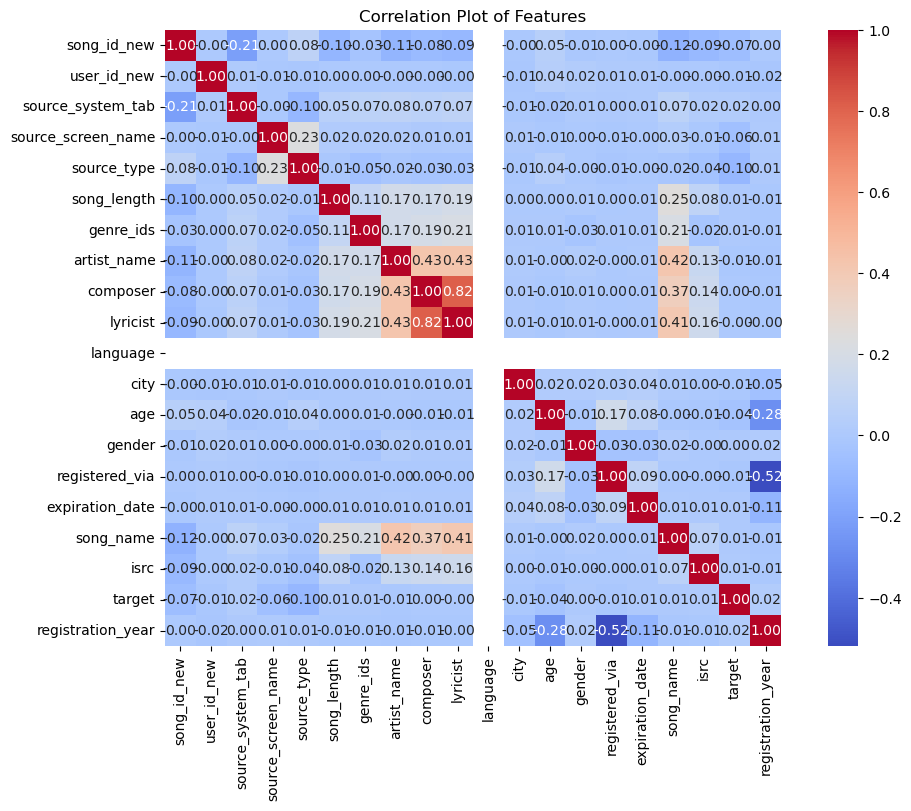

In [17]:
numeric_df = train.select_dtypes(include=['float64', 'int32', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add title and show the plot
plt.title('Correlation Plot of Features')
plt.show();

In [18]:
import pandas as pd
sample_fraction = 0.05  
sample = train.sample(frac=sample_fraction, random_state=42)

print(f"Original dataset size: {len(train)}")
print(f"Sampled dataset size: {len(sample)}")

print(sample.info())

Original dataset size: 1296777
Sampled dataset size: 64839
<class 'pandas.core.frame.DataFrame'>
Index: 64839 entries, 990642 to 1323823
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id_new         64839 non-null  int64  
 1   user_id_new         64839 non-null  int32  
 2   source_system_tab   64839 non-null  int32  
 3   source_screen_name  64839 non-null  int32  
 4   source_type         64839 non-null  int32  
 5   song_length         64839 non-null  float64
 6   genre_ids           64839 non-null  int32  
 7   artist_name         64839 non-null  int32  
 8   composer            64839 non-null  int32  
 9   lyricist            64839 non-null  int32  
 10  language            64839 non-null  float64
 11  city                64839 non-null  float64
 12  age                 64839 non-null  float64
 13  gender              64839 non-null  int32  
 14  registered_via      64839 non-null  float

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = sample.drop('target', axis=1)
y = sample['target']

# Train a RandomForest model with minimal parameters
rf = RandomForestClassifier(
    n_estimators=10,       # Number of trees in the forest
    max_depth=None,        # No limit on the depth of the trees
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    random_state=42        # Seed for random number generator
)

rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Display feature importances sorted by importance
print(importance_df.sort_values(by='Importance', ascending=False))

               Feature  Importance
1          user_id_new    0.099177
0          song_id_new    0.088500
15     expiration_date    0.083266
12                 age    0.072415
17                isrc    0.070345
16           song_name    0.070034
5          song_length    0.069796
9             lyricist    0.063335
8             composer    0.063165
7          artist_name    0.058891
11                city    0.057683
18   registration_year    0.051766
3   source_screen_name    0.035395
4          source_type    0.033335
14      registered_via    0.023297
6            genre_ids    0.022105
2    source_system_tab    0.021351
13              gender    0.016143
10            language    0.000000


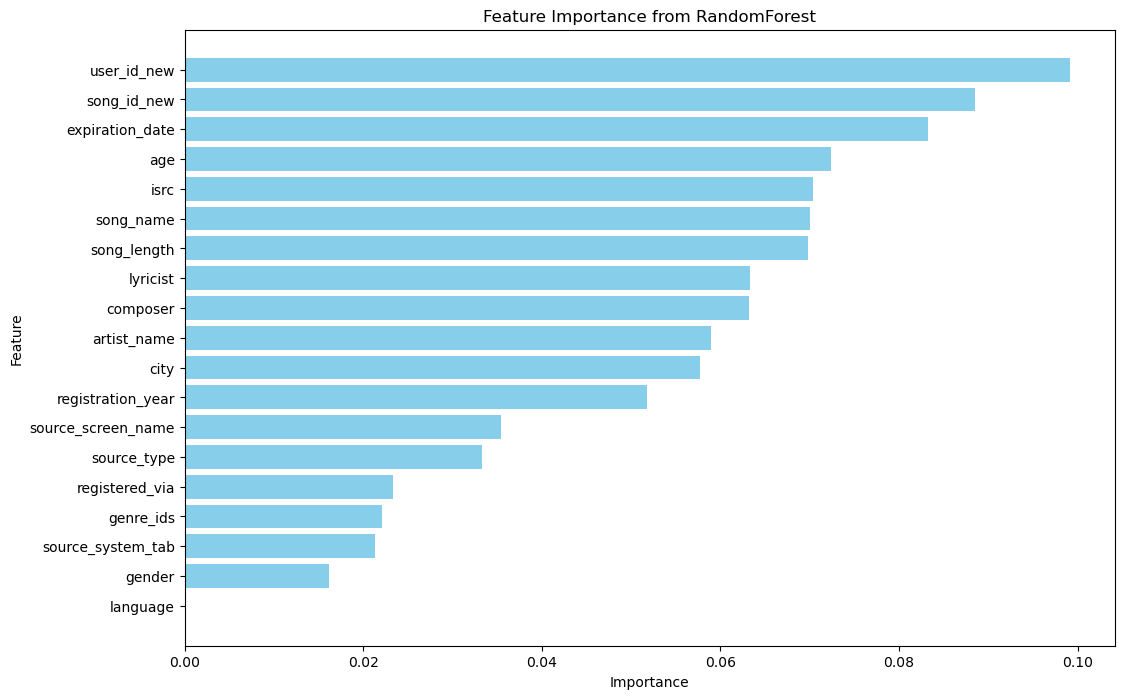

In [75]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show();

               Feature  Importance
3   source_screen_name    0.154689
0          song_id_new    0.149110
2    source_system_tab    0.135218
4          source_type    0.116356
1          user_id_new    0.052766
17                isrc    0.047518
5          song_length    0.040002
16           song_name    0.039445
9             lyricist    0.037930
15     expiration_date    0.037191
12                 age    0.035533
8             composer    0.034527
7          artist_name    0.034030
18   registration_year    0.026589
11                city    0.022430
6            genre_ids    0.020300
14      registered_via    0.011266
13              gender    0.005100
10            language    0.000000


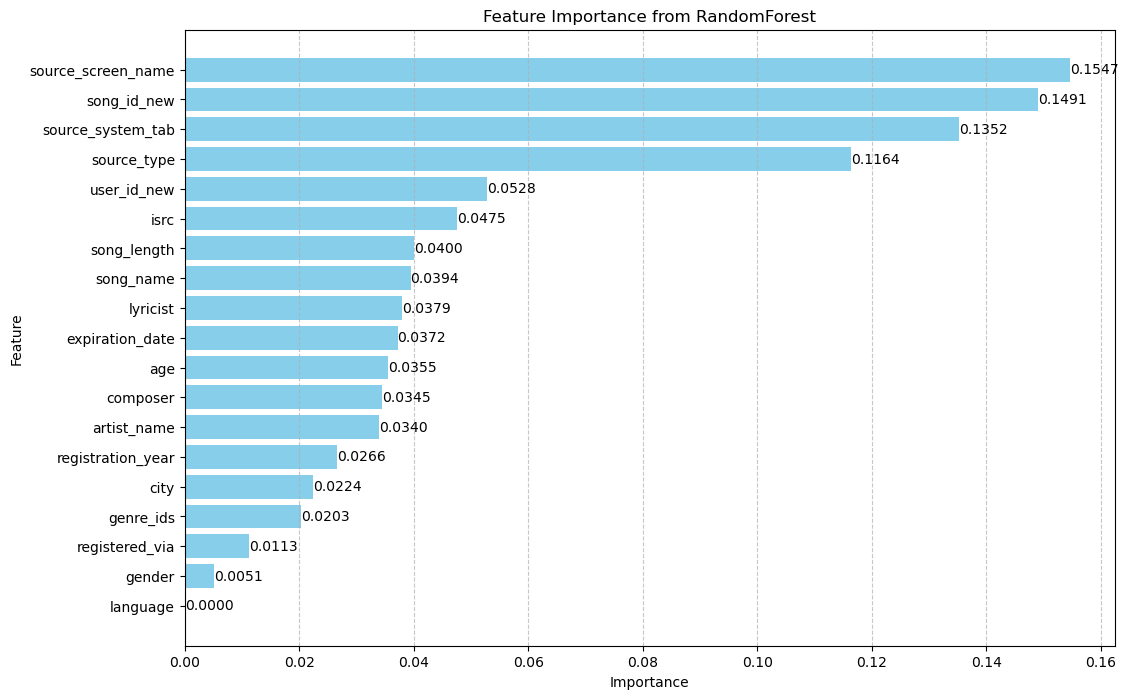

In [76]:
rf = RandomForestClassifier(
    n_estimators=50,       # Increased number of trees for better stability
    max_depth=10,          # Limit the depth to prevent overfitting
    min_samples_split=5,   # Increase minimum number of samples required to split an internal node
    min_samples_leaf=2,    # Increase minimum number of samples required to be at a leaf node
    random_state=42        # Seed for random number generator
)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print(importance_df)

# Plot feature importances as a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# Add data labels to bars
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2, 
        f'{bar.get_width():.4f}', 
        va='center',
        ha='left',         # Align text to the left of the bar
        color='black'      # Color of the text
    )

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # Display the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In [77]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6443
Test Accuracy: 0.6509


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the RandomForest model with fine-tuned parameters
rf = RandomForestClassifier(
    n_estimators=100,       # Increased number of trees for better model stability and performance
    max_depth=10,           # Increased depth to capture more complexity
    min_samples_split=5,    # Minimum number of samples required to split an internal node
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node
    max_features='sqrt',    # Number of features to consider for the best split (sqrt for classification)
    random_state=42,         # Seed for random number generator
)

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [43]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6845
Test Accuracy: 0.6475


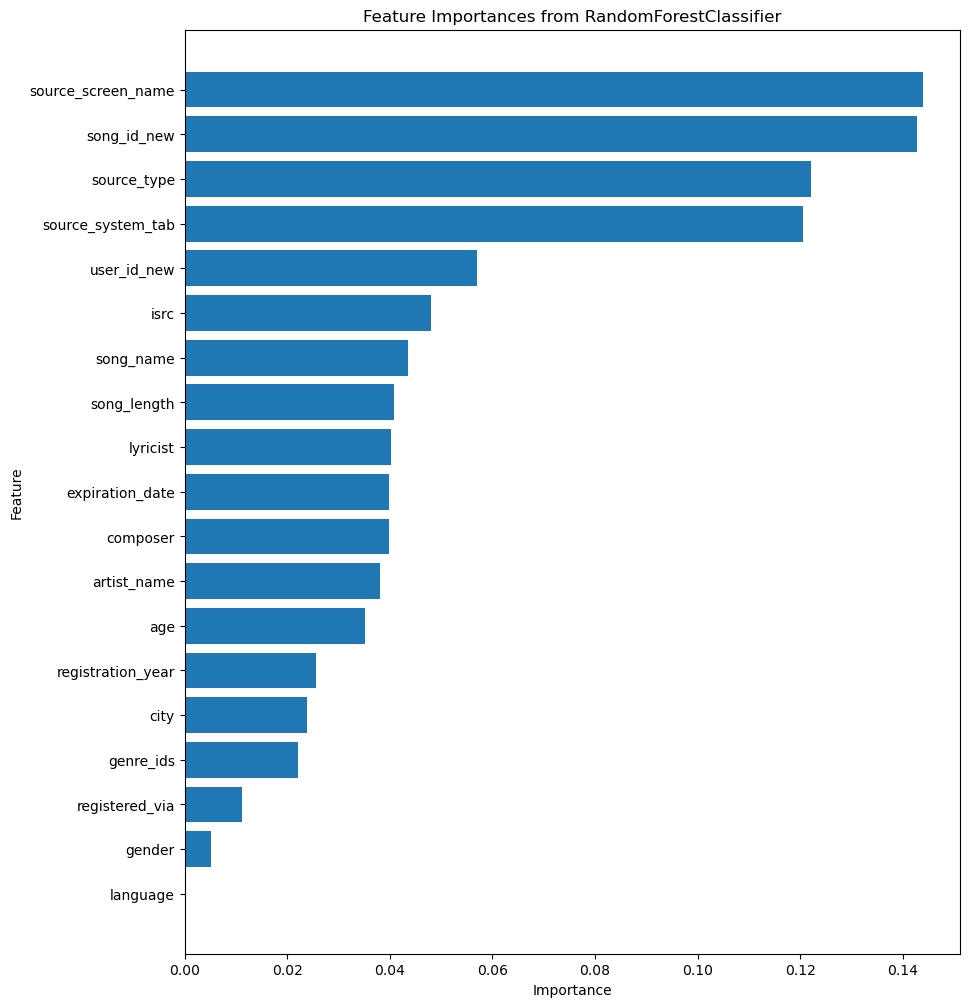

In [50]:
importances = rf.feature_importances_

# Get feature names from the dataframe
feature_names = X_train.columns

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 12))
plt.title('Feature Importances from RandomForestClassifier')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the RandomForest model with fine-tuned parameters
rf = RandomForestClassifier(
    n_estimators=100,       # Increased number of trees for better model stability and performance
    max_depth=30,           # Increased depth to capture more complexity
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=5,     # Minimum number of samples required to be at a leaf node
    max_features=0.8,    # Number of features to consider for the best split (sqrt for classification)
    random_state=42,         # Seed for random number generator
)

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=0.8, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [64]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9483
Test Accuracy: 0.6487


model is overfitting on the training data.

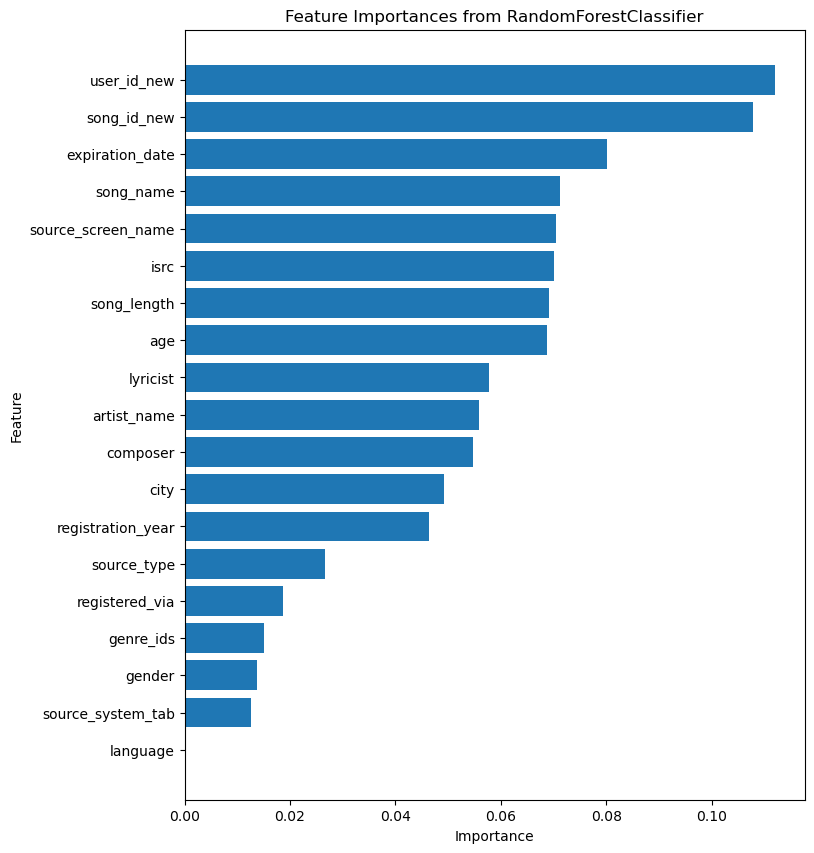

In [65]:
importances = rf.feature_importances_

# Get feature names from the dataframe
feature_names = X_train.columns

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 10))
plt.title('Feature Importances from RandomForestClassifier')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

# Define features (X) and target (y)
X = sample.drop('target', axis=1)
y = sample['target']

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages
    max_depth=3,         # Maximum depth of the individual trees
    random_state=42      # Seed for reproducibility
)

# Fit the model on the data
gb.fit(X, y)

GradientBoostingClassifier(random_state=42)

               Feature  Importance
3   source_screen_name    0.482713
0          song_id_new    0.226348
4          source_type    0.050895
2    source_system_tab    0.044920
17                isrc    0.039798
1          user_id_new    0.032413
6            genre_ids    0.020473
9             lyricist    0.017410
18   registration_year    0.017307
7          artist_name    0.013235
12                 age    0.011585
15     expiration_date    0.010862
5          song_length    0.010139
16           song_name    0.009710
8             composer    0.005789
11                city    0.004206
14      registered_via    0.002196
10            language    0.000000
13              gender    0.000000


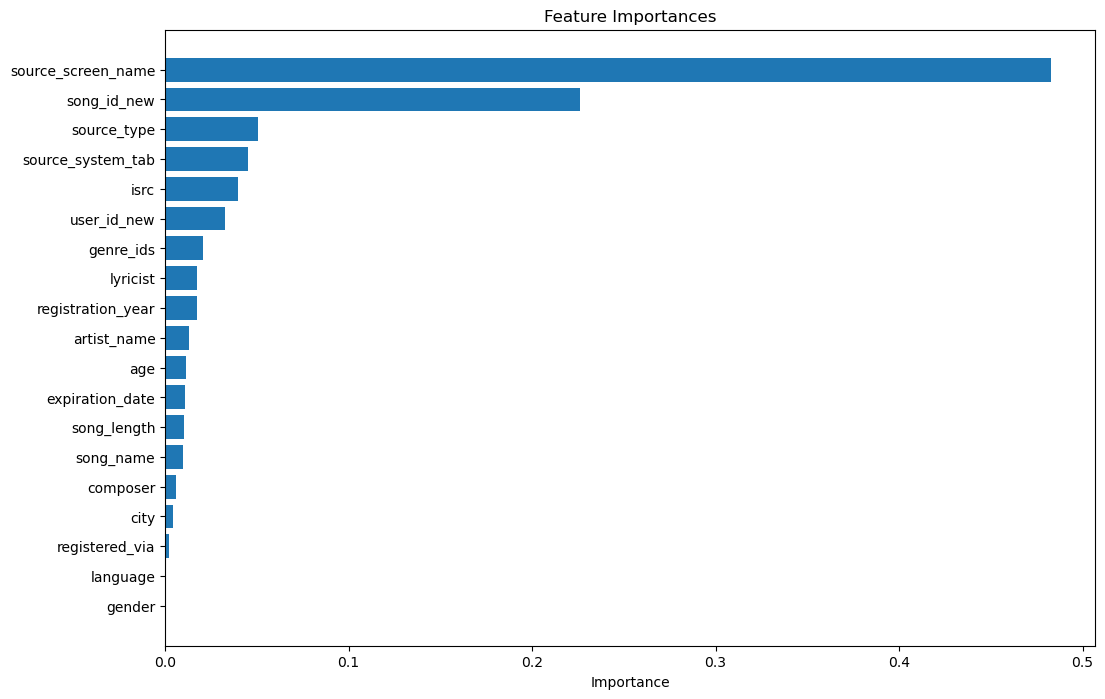

In [83]:
# Get feature importances
importances = gb.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Display feature importances sorted by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()

In [84]:
# Make predictions
y_pred = gb.predict(X)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6458


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100],  # Number of boosting stages
    'max_depth': [5],           # Maximum depth of the individual trees
    'learning_rate': [0.1],  # Step size shrinking
    'subsample': [1.0]     # Fraction of samples used to fit each tree
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Set up the GridSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,       # Fewer folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model
random_search.fit(X, y)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_ 

print("Best parameters found:", best_params)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [95]:
#Make predictions with the best model
y_pred = best_model.predict(X)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f"Improved Accuracy: {accuracy:.4f}")

Improved Accuracy: 0.6718


               Feature  Importance
3   source_screen_name    0.360974
0          song_id_new    0.201509
1          user_id_new    0.069470
17                isrc    0.052111
15     expiration_date    0.032346
16           song_name    0.032172
5          song_length    0.031343
2    source_system_tab    0.028360
9             lyricist    0.027930
7          artist_name    0.027732
12                 age    0.025808
4          source_type    0.023073
6            genre_ids    0.022693
8             composer    0.022163
18   registration_year    0.021524
11                city    0.010829
14      registered_via    0.007356
13              gender    0.002608
10            language    0.000000


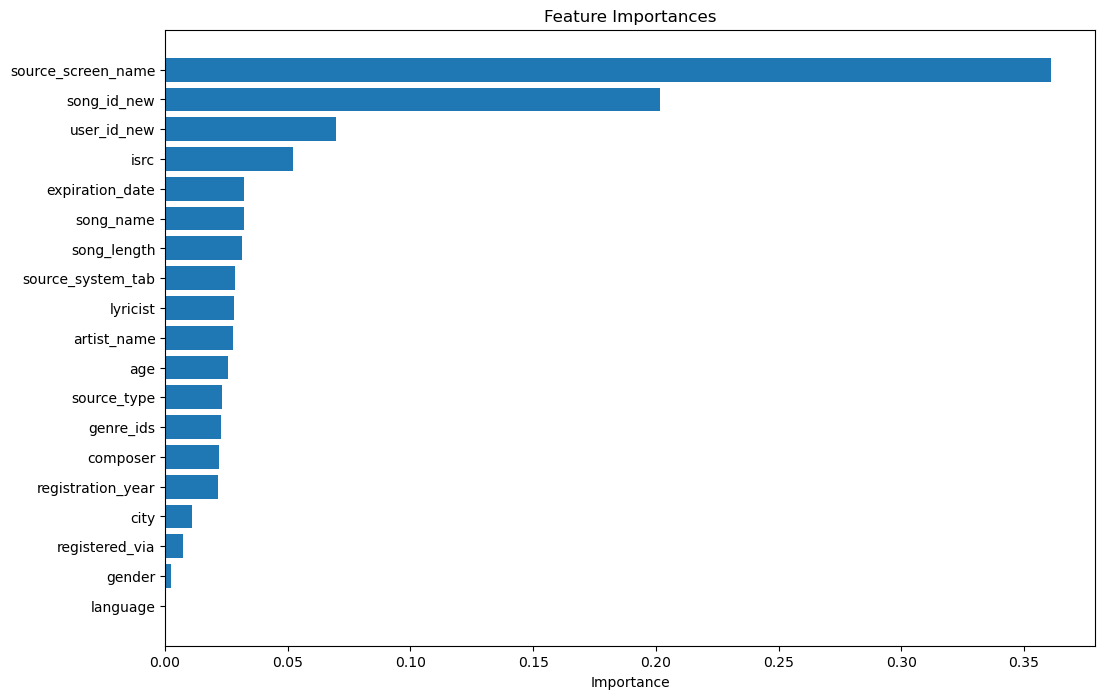

In [96]:
# Get feature importances
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Display feature importances sorted by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Assuming 'sample' is your DataFrame and 'target' is the column you're predicting
X = sample.drop(columns='target')
y = sample['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

C:\Users\honey\anaconda_new\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [23]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report for the test set
print('Classification Report for Test Set:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.75
Test Accuracy: 0.65
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.63      0.53      0.57      5767
         1.0       0.66      0.75      0.70      7201

    accuracy                           0.65     12968
   macro avg       0.65      0.64      0.64     12968
weighted avg       0.65      0.65      0.65     12968



#### XGB with some parameters

In [28]:
from xgboost import XGBClassifier, plot_importance

In [25]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',  # Change to your desired evaluation metric, e.g., 'accuracy', 'f1', 'logloss'
    colsample_bytree=0.8,  # Example parameter: fraction of columns to be randomly sampled for each tree
    learning_rate=0.1,    # Example parameter: step size for each iteration
    max_depth=6,         # Example parameter: maximum depth of the trees
    n_estimators=100,    # Example parameter: number of trees
    gamma=0,             # Example parameter: regularization term for each tree
    min_child_weight=1,  # Example parameter: minimum sum of weights of all observations required in a child
    subsample=0.8,       # Example parameter: fraction of samples to be used for each tree
    random_state=42      # Seed for reproducibility
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

[0]	validation_0-auc:0.65926
[1]	validation_0-auc:0.66540
[2]	validation_0-auc:0.66795


C:\Users\honey\anaconda_new\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\honey\anaconda_new\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.67044
[4]	validation_0-auc:0.67022
[5]	validation_0-auc:0.67031
[6]	validation_0-auc:0.67051
[7]	validation_0-auc:0.67048
[8]	validation_0-auc:0.67152
[9]	validation_0-auc:0.67160
[10]	validation_0-auc:0.67314
[11]	validation_0-auc:0.67334
[12]	validation_0-auc:0.67391
[13]	validation_0-auc:0.67362
[14]	validation_0-auc:0.67441
[15]	validation_0-auc:0.67460
[16]	validation_0-auc:0.67523
[17]	validation_0-auc:0.67578
[18]	validation_0-auc:0.67577
[19]	validation_0-auc:0.67578
[20]	validation_0-auc:0.67684
[21]	validation_0-auc:0.67725
[22]	validation_0-auc:0.67728
[23]	validation_0-auc:0.67777
[24]	validation_0-auc:0.67821
[25]	validation_0-auc:0.67839
[26]	validation_0-auc:0.67894
[27]	validation_0-auc:0.67930
[28]	validation_0-auc:0.67941
[29]	validation_0-auc:0.67955
[30]	validation_0-auc:0.67991
[31]	validation_0-auc:0.68002
[32]	validation_0-auc:0.68020
[33]	validation_0-auc:0.68083
[34]	validation_0-auc:0.68119
[35]	validation_0-auc:0.68148
[36]	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report for the test set
print('Classification Report for Test Set:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.69
Test Accuracy: 0.65
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.63      0.51      0.57      5767
         1.0       0.66      0.76      0.71      7201

    accuracy                           0.65     12968
   macro avg       0.65      0.64      0.64     12968
weighted avg       0.65      0.65      0.65     12968



<Figure size 1000x800 with 0 Axes>

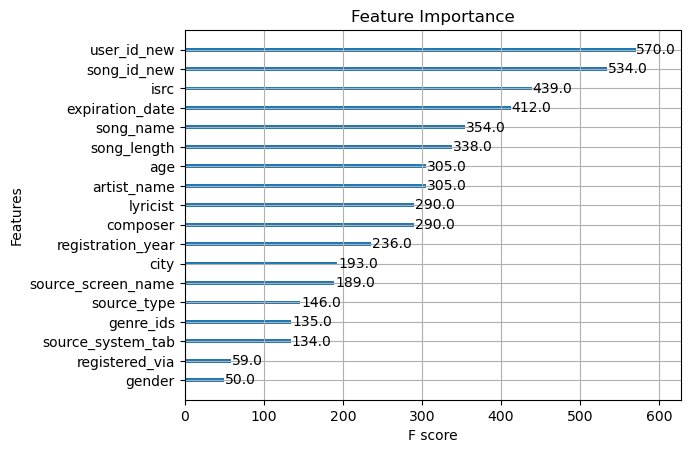

In [29]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20, title='Feature Importance')
plt.show();

#### XGB with better parameters

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False)

# Define a parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 10]  # Only if you have imbalanced classes
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

C:\Users\honey\anaconda_new\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [33]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import lightgbm.plotting as lgb_plotting

In [35]:
# Assuming 'sample' is your DataFrame and 'target' is the column you're predicting
X = sample.drop(columns='target')
y = sample['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',   # For binary classification
    'metric': 'binary_error', # Metric to evaluate
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,        # Number of leaves in one tree
    'learning_rate': 0.05,   # Learning rate
    'feature_fraction': 0.9   # Fraction of features to be used
}


# Train the model with early stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],   # List of datasets to evaluate  # Stop if no improvement for 10 rounds
)

[LightGBM] [Info] Number of positive: 28492, number of negative: 23379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 51871, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549286 -> initscore=0.197785
[LightGBM] [Info] Start training from score 0.197785


In [40]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration)
y_test_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Convert probabilities to binary class predictions
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

# Print accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report for the test set
print('Classification Report for Test Set:')
print(classification_report(y_test, y_test_pred_binary))


Training Accuracy: 0.66
Test Accuracy: 0.65
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.63      0.51      0.56      5767
         1.0       0.66      0.76      0.71      7201

    accuracy                           0.65     12968
   macro avg       0.65      0.63      0.63     12968
weighted avg       0.65      0.65      0.64     12968



<Figure size 1000x800 with 0 Axes>

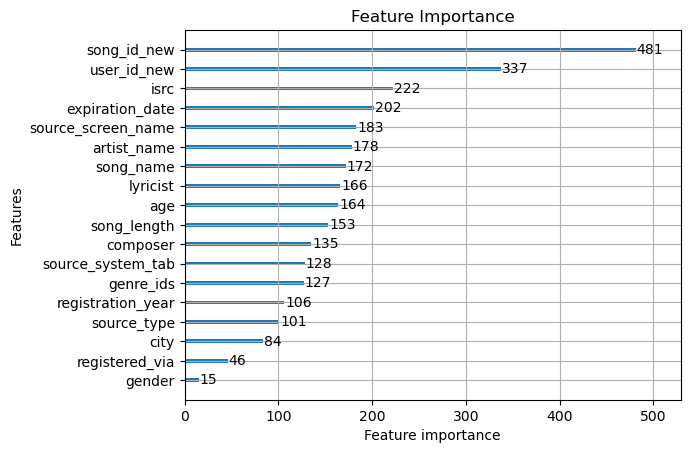

In [41]:
# Plot feature importance
plt.figure(figsize=(10, 8))
lgb_plotting.plot_importance(model, importance_type='split', max_num_features=20, title='Feature Importance')
plt.show()

               Feature  Importance
0          song_id_new    0.145098
3   source_screen_name    0.135408
2    source_system_tab    0.129311
4          source_type    0.120534
1          user_id_new    0.055968
17                isrc    0.049515
16           song_name    0.042569
5          song_length    0.041437
8             composer    0.041110
9             lyricist    0.040597
15     expiration_date    0.039636
7          artist_name    0.038345
12                 age    0.034506
18   registration_year    0.024681
11                city    0.023673
6            genre_ids    0.020960
14      registered_via    0.011731
13              gender    0.004921
10            language    0.000000


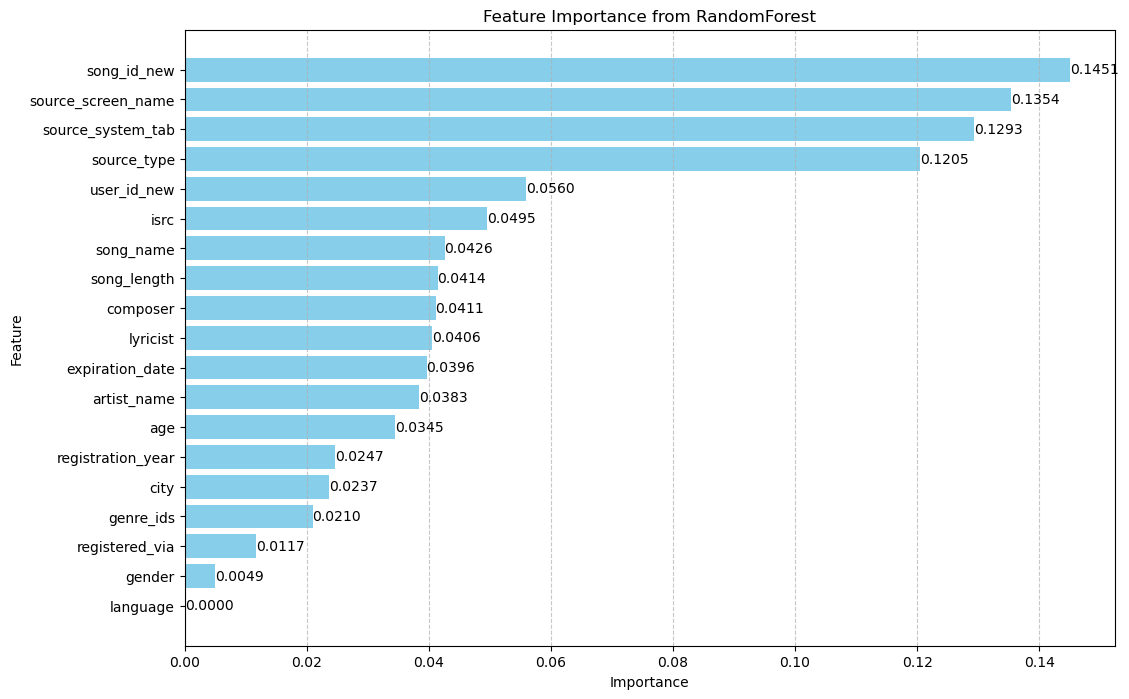

In [67]:
rf = RandomForestClassifier(
    n_estimators=50,       # Increased number of trees for better stability
    max_depth=10,          # Limit the depth to prevent overfitting
    min_samples_split=5,   # Increase minimum number of samples required to split an internal node
    min_samples_leaf=2,    # Increase minimum number of samples required to be at a leaf node
    random_state=42        # Seed for random number generator
)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print(importance_df)

# Plot feature importances as a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# Add data labels to bars
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2, 
        f'{bar.get_width():.4f}', 
        va='center',
        ha='left',         # Align text to the left of the bar
        color='black'      # Color of the text
    )

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # Display the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show();

In [68]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6833
Test Accuracy: 0.6474


In [69]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on training and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification reports
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print classification reports
print("\nTraining Classification Report:")
print(train_classification_report)

print("\nTest Classification Report:")
print(test_classification_report)


Training Accuracy: 0.6833
Test Accuracy: 0.6474

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61     23379
         1.0       0.68      0.80      0.73     28492

    accuracy                           0.68     51871
   macro avg       0.68      0.67      0.67     51871
weighted avg       0.68      0.68      0.68     51871


Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.51      0.56      5767
         1.0       0.66      0.76      0.70      7201

    accuracy                           0.65     12968
   macro avg       0.64      0.63      0.63     12968
weighted avg       0.64      0.65      0.64     12968



Training Confusion Matrix:


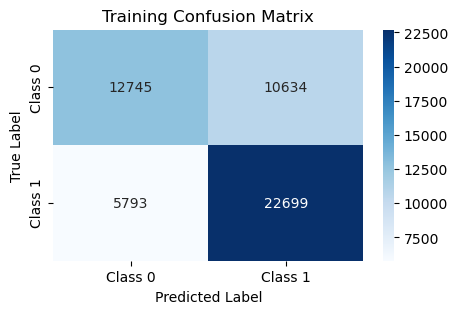

Test Confusion Matrix:


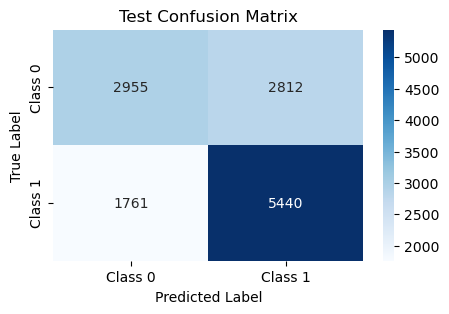

In [76]:
# Generate confusion matrices for train and test data
from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a function to plot confusion matrices
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Assuming you have class names, otherwise you can set them as ['0', '1'] or similar
class_names = ['Class 0', 'Class 1']

# Plot confusion matrices
print("Training Confusion Matrix:")
plot_confusion_matrix(train_conf_matrix, class_names, 'Training Confusion Matrix')

print("Test Confusion Matrix:")
plot_confusion_matrix(test_conf_matrix, class_names, 'Test Confusion Matrix')


In [219]:
X = train.drop(columns=['target'])  # Exclude the target column
y = train['target']  # Target variable

# Optionally, split data into training and validation sets if needed
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with parameters
rf = RandomForestClassifier(
    n_estimators=50,       # Number of trees
    max_depth=10,          # Depth of each tree
    min_samples_split=5,   # Minimum samples to split
    min_samples_leaf=2,    # Minimum samples at leaf
    random_state=42        # Random seed
)

# Fit the model on the full training data
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

               Feature  Importance
3   source_screen_name    0.230877
4          source_type    0.188747
2    source_system_tab    0.178842
0          song_id_new    0.165148
1          user_id_new    0.030600
17                isrc    0.028845
6            genre_ids    0.025857
12                 age    0.019789
9             lyricist    0.018476
7          artist_name    0.018472
16           song_name    0.018091
8             composer    0.016777
5          song_length    0.016319
18   registration_year    0.014167
15     expiration_date    0.013492
11                city    0.008356
14      registered_via    0.005185
13              gender    0.001959
10            language    0.000000


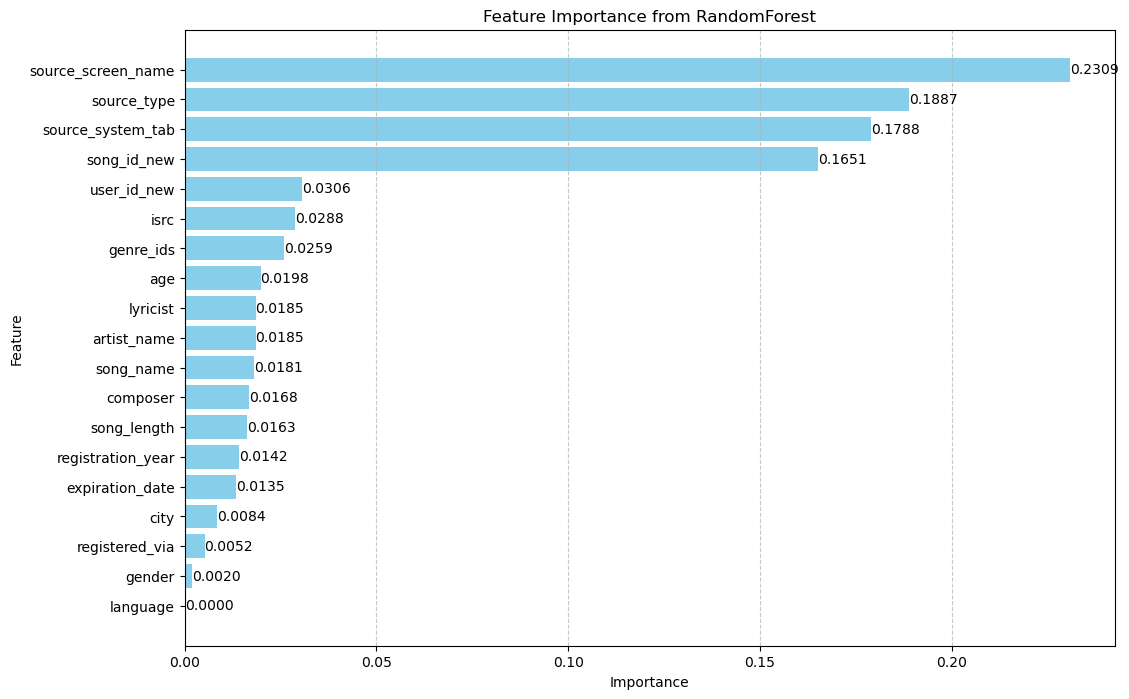

In [221]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print(importance_df)

# Plot feature importances as a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# Add data labels to bars
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2, 
        f'{bar.get_width():.4f}', 
        va='center',
        ha='left',         # Align text to the left of the bar
        color='black'      # Color of the text
    )

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # Display the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In [226]:
y_test_pred = rf.predict(X_val)

# Calculate accuracy score
test_accuracy = accuracy_score(y_val, y_test_pred)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6501


In [229]:
y_train_pred = rf.predict(X_train_full)
y_test_pred = rf.predict(X_val)

In [231]:
#Calculate accuracy scores
train_accuracy = accuracy_score(y_train_full, y_train_pred)
test_accuracy = accuracy_score(y_val, y_test_pred)

# Print the accuracy scores
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.6529
Test Accuracy: 0.6501


### INFERENCE:

All models work best with the maximum Accuracy rate at 65%. However, 
##### Random Forest with the parameters _estimators=50,       # Number of trees
    max_depth=10,          # Depth of each tree
    min_samples_split=5,   # Minimum samples to split
    min_samples_leaf=2,    # Minimum samples at leaf
    random_state=42        # Random seed
) fit the model correctly and do not overfit or underfit. 
Using other parameters or other models on this data tends to overfit on the training model. 

The most important feature names are source screen Name, source type, source system tab and song_id_new which lead the users to frequently listen to songs. 